In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración general de estilos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 3, Finished, Available, Finished)

In [2]:
# Loading dataset

path = 'Tables/dbo/Student_variables_non_scaled'
df = spark.read.format('Delta').load(path)
df = df.toPandas()
df.head()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 4, Finished, Available, Finished)

,StudentNumber,Age,IsChurchMemberCMIS,lastcompletedactivitydate,canvaslastlogin,Num_Courses,Dropped_Courses,avg_percentage_score,courses_under_80,HDI_rank,Human_Development_Index_HDI_2023,is_enrolled_next_term
0,20083785,38,1,18.0,2.0,2,0,100.0,0,164.0,0.56,1
1,22537754,37,1,14.0,2.0,2,0,100.0,0,164.0,0.56,1
2,22589730,26,1,127.0,2.0,2,0,100.0,0,164.0,0.56,1
3,22743912,33,1,5.0,2.0,2,0,100.0,0,164.0,0.56,1
4,23114436,32,1,5.0,2.0,2,0,100.0,0,164.0,0.56,1


In [3]:
df.describe()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 5, Finished, Available, Finished)

,StudentNumber,Age,IsChurchMemberCMIS,lastcompletedactivitydate,canvaslastlogin,Num_Courses,Dropped_Courses,avg_percentage_score,courses_under_80,HDI_rank,Human_Development_Index_HDI_2023,is_enrolled_next_term
count,7.495100e+04,74951.000000,74951.000000,74430.000000,74945.000000,74951.000000,74951.000000,74951.000000,74951.000000,74951.000000,74951.000000,74951.000000
mean,2.355371e+07,31.943657,0.804192,31.539111,23.855120,1.980587,0.031487,77.293528,0.598818,106.086923,0.714581,0.700698
std,5.262816e+06,10.746190,0.396824,45.352036,37.875467,0.843772,0.202311,27.590337,0.842151,61.507010,0.161048,0.457955
min,1.700000e+01,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.388000,0.000000
25%,2.227235e+07,24.000000,1.000000,5.000000,1.000000,1.000000,0.000000,70.730000,0.000000,17.000000,0.560000,0.000000
50%,2.302697e+07,29.000000,1.000000,6.000000,3.000000,2.000000,0.000000,89.710000,0.000000,137.000000,0.662000,1.000000
75%,3.001392e+07,38.000000,1.000000,56.000000,22.000000,2.000000,0.000000,95.676667,1.000000,164.000000,0.938000,1.000000
max,3.006870e+07,83.000000,1.000000,330.000000,254.000000,7.000000,3.000000,100.000000,5.000000,193.000000,0.983000,1.000000


StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 14, Finished, Available, Finished)

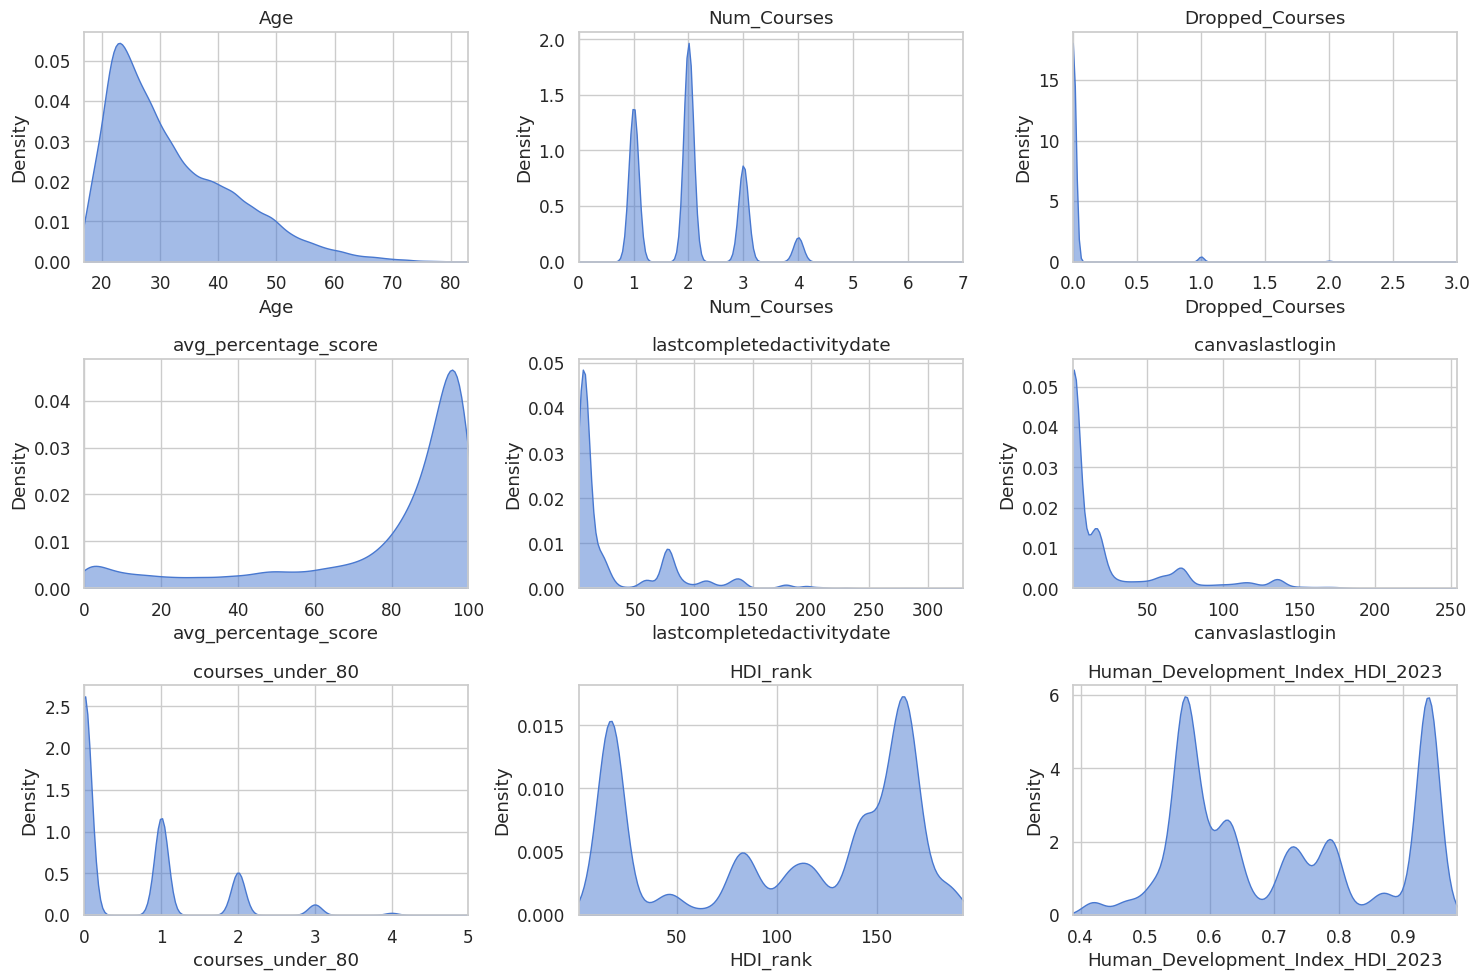

In [12]:
# ================================
# 1. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS
# ================================
num_cols = ["Age", "Num_Courses", "Dropped_Courses", "avg_percentage_score","lastcompletedactivitydate","canvaslastlogin", "courses_under_80", "HDI_rank", "Human_Development_Index_HDI_2023"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_xlim(df[col].min(), df[col].max())
    axes[i].set_title(col)

plt.tight_layout()
plt.show()



StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 15, Finished, Available, Finished)

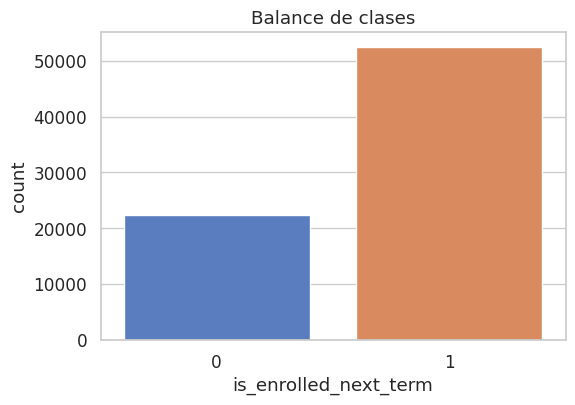

In [13]:
# ================================
# 2. BALANCE DE CLASES
# ================================
plt.figure(figsize=(6,4))
sns.countplot(x="is_enrolled_next_term", data=df)
plt.title("Balance de clases")
plt.show()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 16, Finished, Available, Finished)

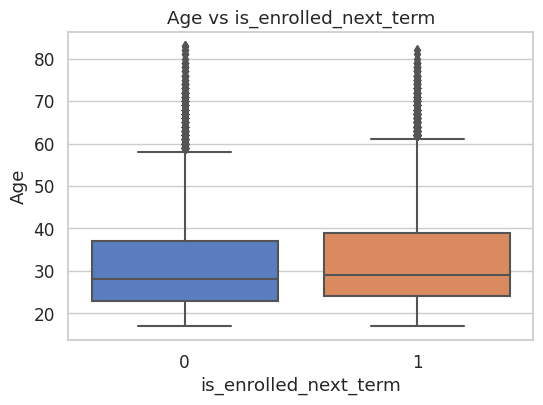

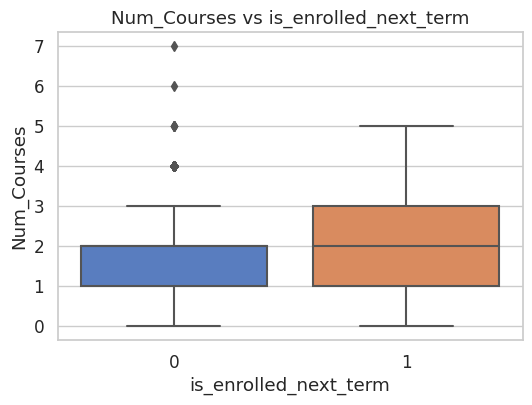

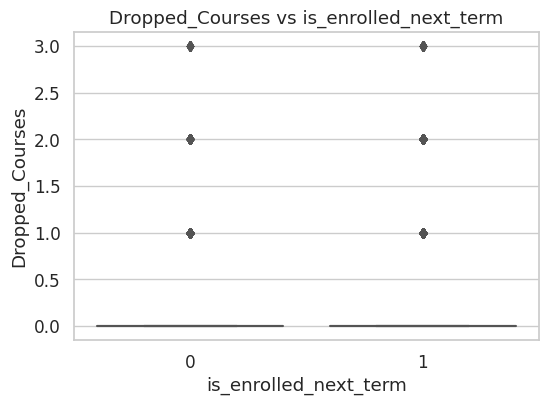

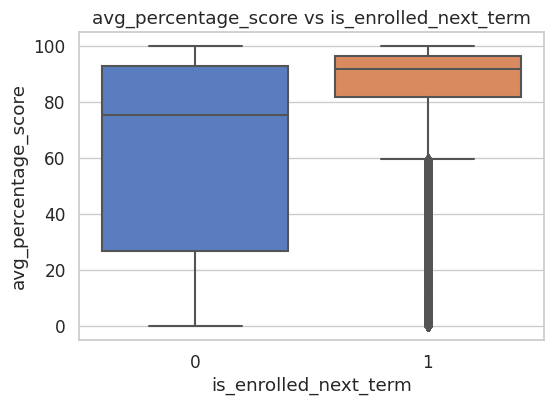

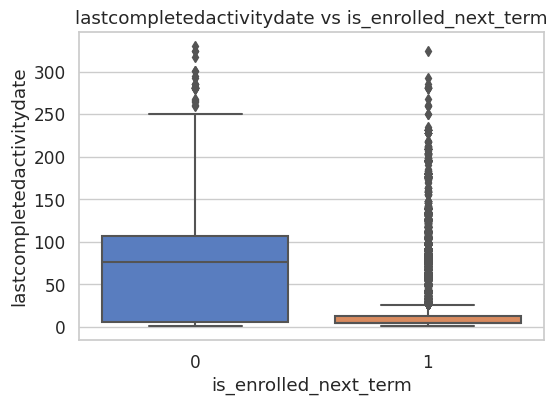

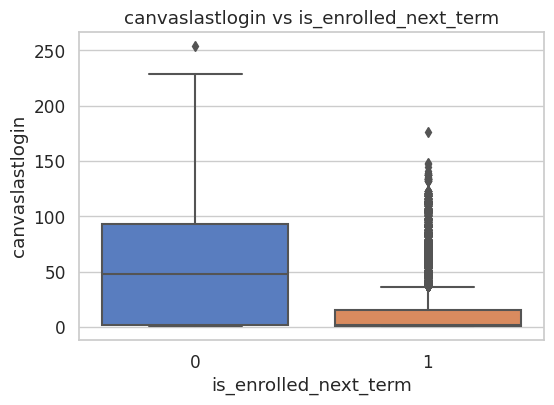

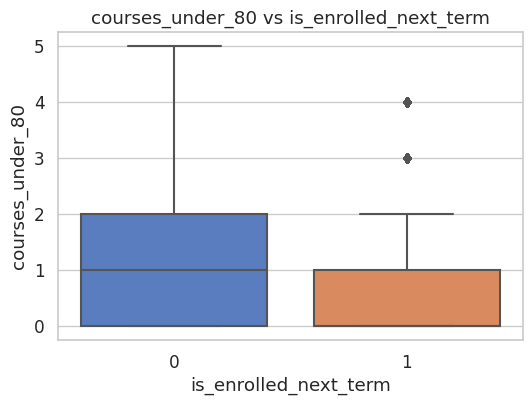

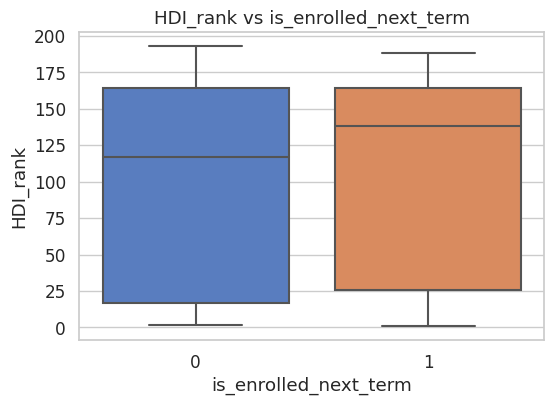

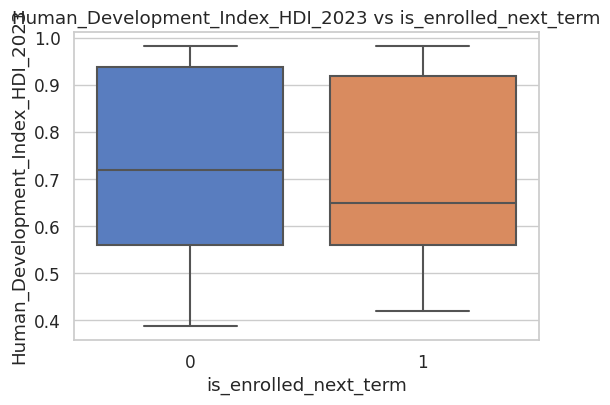

In [14]:
# ================================
# 3. RELACIÓN VARIABLES NUMÉRICAS vs TARGET
# ================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="is_enrolled_next_term", y=col, data=df)
    plt.title(f"{col} vs is_enrolled_next_term")
    plt.show()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 17, Finished, Available, Finished)

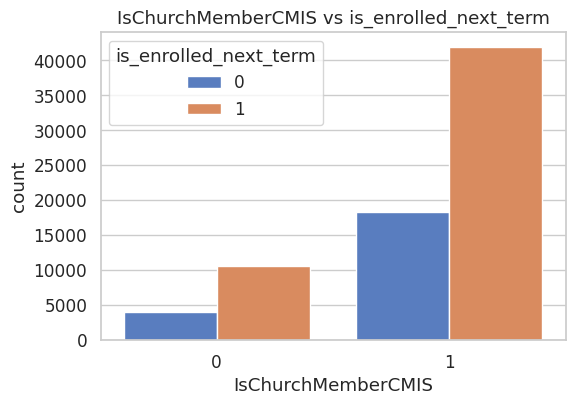

In [15]:
# ================================
# 4. VARIABLES CATEGÓRICAS
# ================================
cat_cols = ["IsChurchMemberCMIS"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue="is_enrolled_next_term")
    plt.title(f"{col} vs is_enrolled_next_term")
    plt.show()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 18, Finished, Available, Finished)

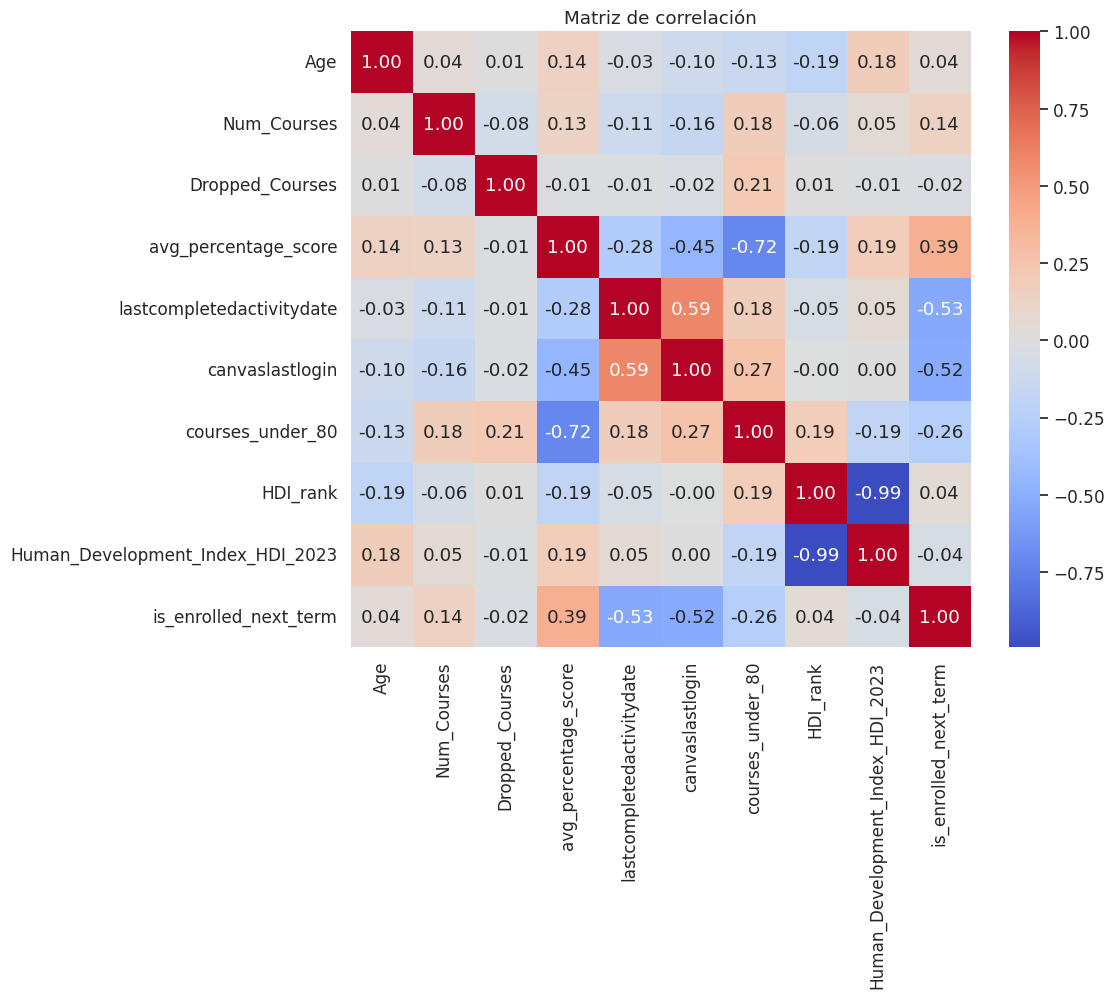

In [16]:
# ================================
# 5. MATRIZ DE CORRELACIÓN
# ================================
plt.figure(figsize=(10, 8))
corr = df[num_cols + ["is_enrolled_next_term"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 19, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


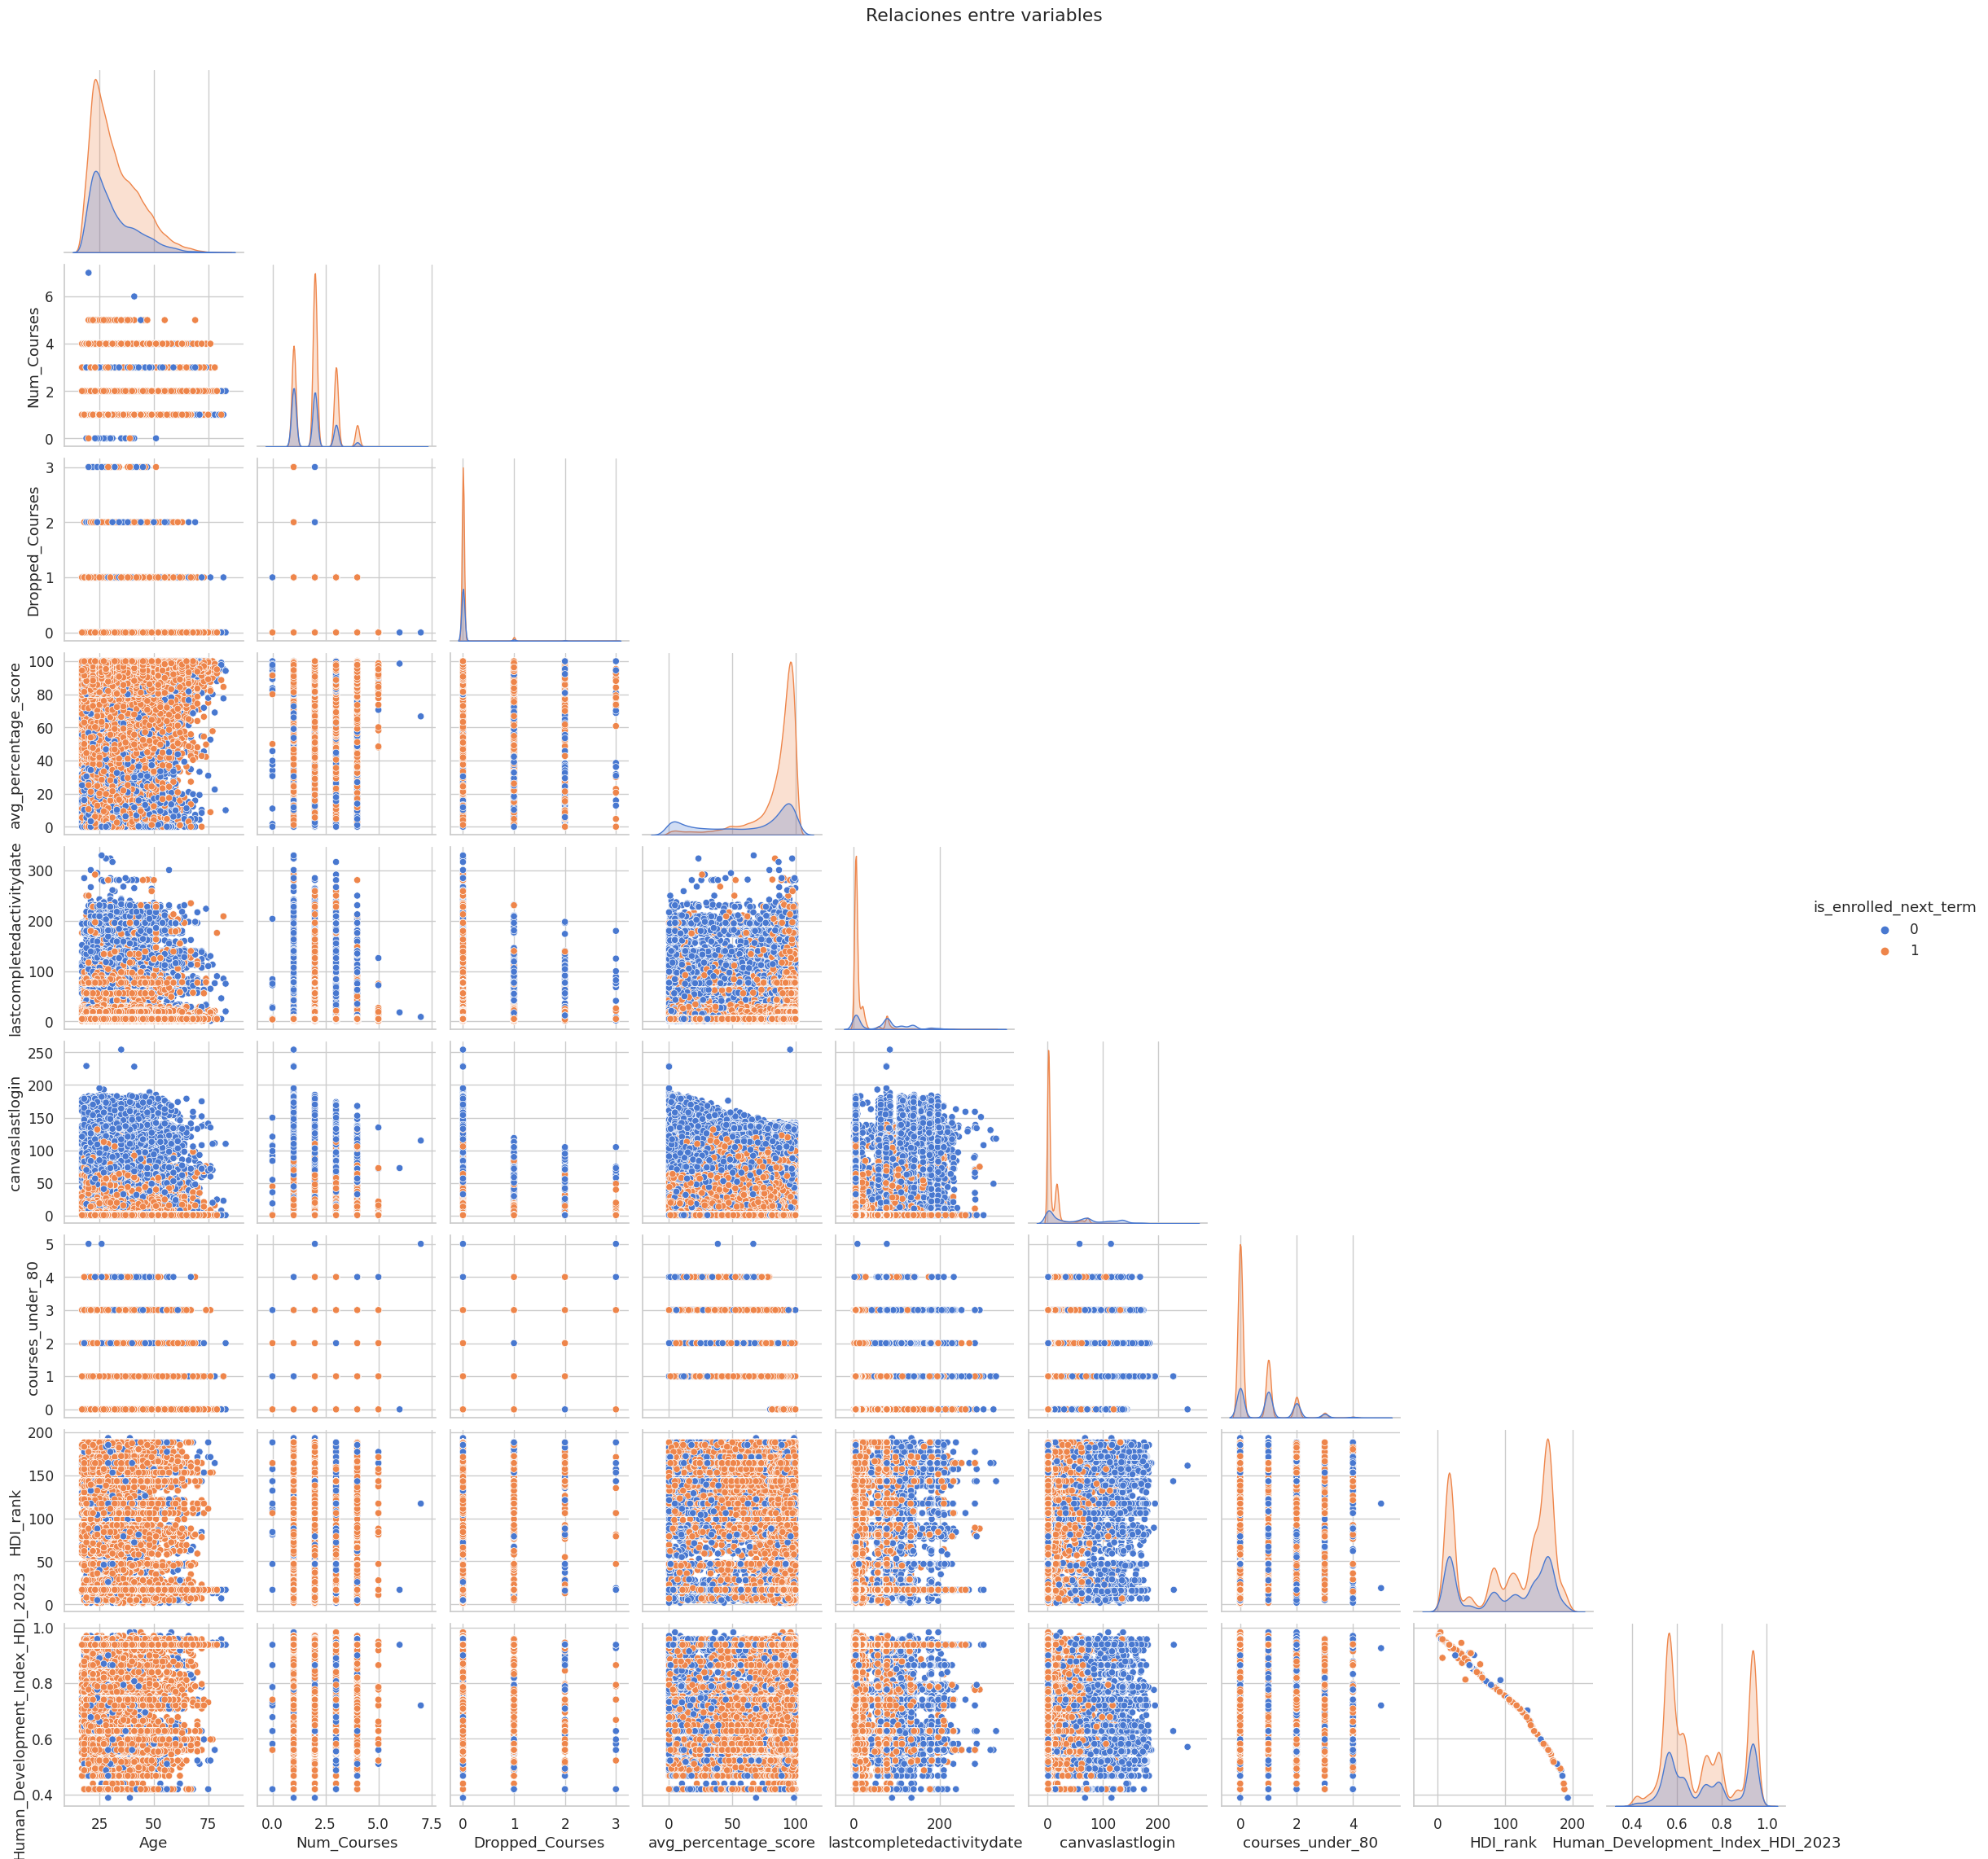

In [17]:
# ================================
# 6. RELACIONES ENTRE VARIABLES (PAIRPLOT)
# ================================
sns.pairplot(df[num_cols + ["is_enrolled_next_term"]], 
             hue="is_enrolled_next_term", diag_kind="kde", corner=True)
plt.suptitle("Relaciones entre variables", y=1.02)
plt.show()

StatementMeta(, 2ad2435a-92f8-4d9c-b626-4e9289693db7, 20, Finished, Available, Finished)

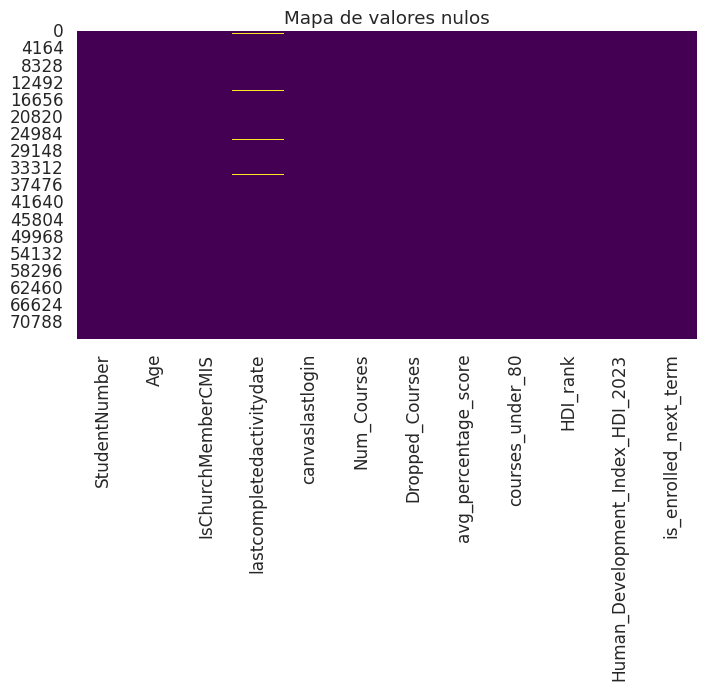

In [18]:
# ================================
# 7. VALORES NULOS
# ================================
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos")
plt.show()